## EXPLORATORY DATA ANALYSIS OF GOOGLE APPS RATINGS

## STEPS:
### IMPORT THE MODULES



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### READ DATA

In [5]:
gdata = pd.read_csv('C:/Users/Harsh/Documents/Google Apps Ratings/googleplaystore.csv') 
#change backward slash to forward slash to avoid unicode error message

In [6]:
gdata.head() #by default it displays 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
gdata.shape

(10841, 13)

In [8]:
gdata.describe() #statistics

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


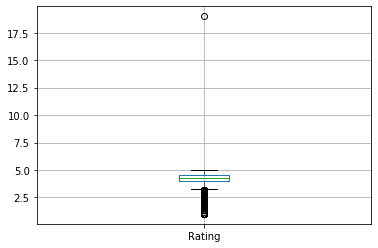

In [9]:
gdata.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7A8D38548>]],
      dtype=object)

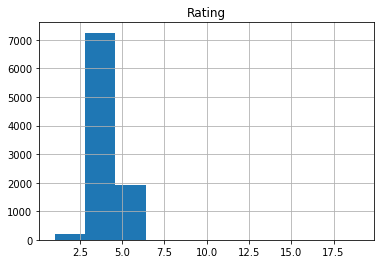

In [10]:
gdata.hist()

In [11]:
gdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### DATA CLEANING


In [12]:
gdata.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Count the missing values

In [13]:
gdata.isnull().sum() 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
#in boxplot we saw one value is outlier. But now criss check how many are outliers
gdata[gdata["Rating"] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
#drop it
gdata.drop([10472], inplace=True)

In [16]:
gdata[10470:10474] #to check if it has been dropped

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


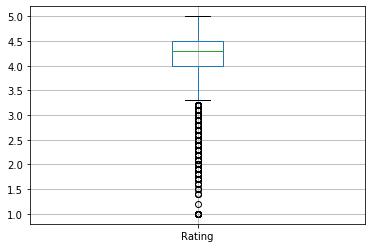

In [17]:
gdata.boxplot() #now we can see there are no outliers, all are under rating 5

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C7AA08E208>]],
      dtype=object)

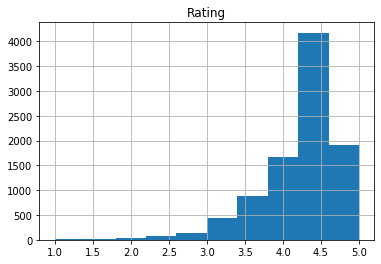

In [18]:
gdata.hist() #it's rightly skewed

#### Drop the columns that are 90% empty

In [19]:
threshold = len(gdata) * 0.1 
threshold
#this is 10% of 10840 (total no. of rows), so using this value we will check which col has 10% values(i.e 90% empty)

1084.0

In [20]:
gdata.dropna(thresh = threshold, axis = 1, inplace = True) #axis is 1 bcz we are doing for col

In [21]:
print(gdata.isnull().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


In [22]:
gdata.shape

(10840, 13)

#### There is no change observed

### Fill the null values using aggregate functions i.e, mean, median, mode

In [23]:
def compute_median(series):
    return series.fillna(series.median())

In [24]:
gdata.Rating = gdata["Rating"].transform(compute_median)

In [25]:
#check for null values again
gdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [26]:
#check the modes of Type, Current Ver and Android Ver to be sure before filling missing values
print(gdata["Type"].mode())
print(gdata["Current Ver"].mode())
print(gdata["Android Ver"].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [27]:
# fill the missing values
gdata["Type"].fillna(str(gdata["Type"].mode().values[0]), inplace=True)
gdata["Current Ver"].fillna(str(gdata["Type"].mode().values[0]), inplace=True)
gdata["Android Ver"].fillna(str(gdata["Type"].mode().values[0]), inplace=True)

In [28]:
gdata.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [29]:
# convert the attributes like: Price (which is in $), Reviews and Installs to numeric (without symbols also) 
gdata["Price"] = gdata["Price"].apply(lambda x: str(x).replace("$", '') if "$" in str(x) else str(x))
gdata["Price"] = gdata["Price"].apply(lambda x: float(x))
gdata["Reviews"] = pd.to_numeric(gdata["Reviews"], errors= "coerce")
gdata["Installs"] = gdata["Installs"].apply(lambda x: str(x).replace("+", '') if "+" in str(x) else str(x))
gdata["Installs"] = gdata["Installs"].apply(lambda x: str(x).replace(",", '') if "," in str(x) else str(x))
gdata["Installs"] = gdata["Installs"].apply(lambda x: float(x))

In [30]:
gdata.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [31]:
gdata.describe() #previously we had only Rating, now we have 4 columns

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


### DATA VISUALIZATION

In [37]:
grp = gdata.groupby("Category")
x = grp["Rating"].agg(np.mean)
y = grp["Price"].agg(np.sum)
z = grp["Reviews"].agg(np.mean)
w = grp["Installs"].agg(np.mean)

print(x, "\n")
print(y, "\n")
print(z, "\n")
print(w)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

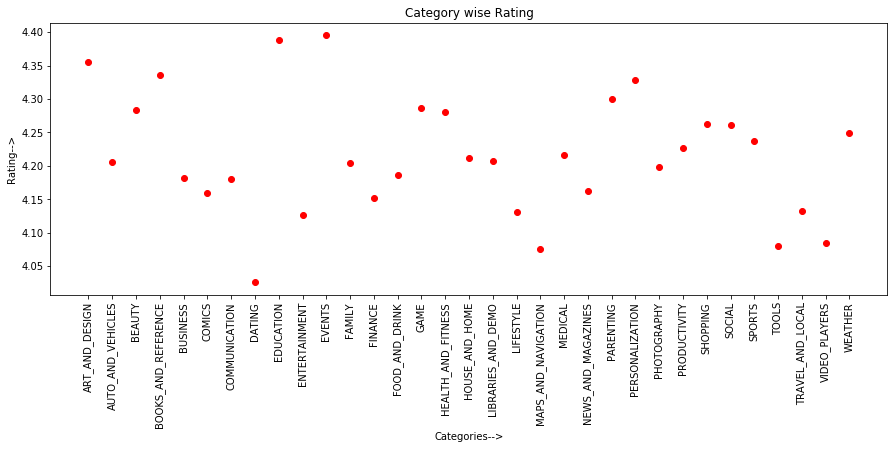

In [84]:
plt.figure(figsize=(15,5))
plt.plot(x, "o", color="r")
plt.xticks(rotation = 90)
plt.title("Category wise Rating")
plt.ylabel("Rating-->")
plt.xlabel("Categories-->")
plt.show()

### We can see Events Apps have the highest rating.

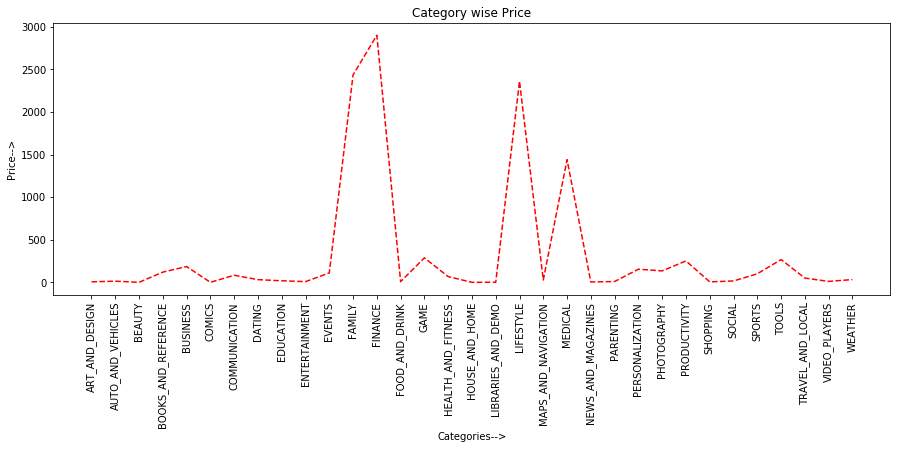

In [85]:
plt.figure(figsize=(15,5))
plt.plot(y, "r--", color="r")
plt.xticks(rotation = 90)
plt.title("Category wise Price")
plt.ylabel("Price-->")
plt.xlabel("Categories-->")
plt.show()

### We can see Finance Apps have the highest Price.

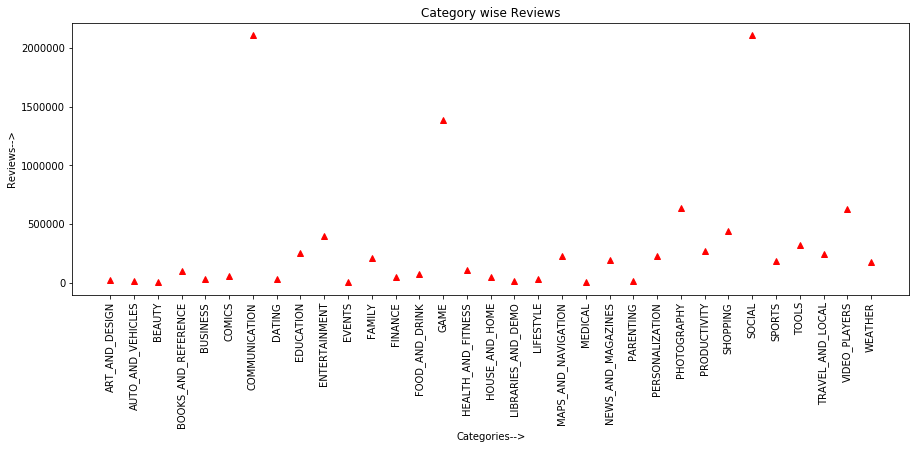

In [87]:
plt.figure(figsize=(15,5))
plt.plot(z, "g^", color="r")
plt.xticks(rotation = 90)
plt.title("Category wise Reviews")
plt.ylabel("Reviews-->")
plt.xlabel("Categories-->")
plt.show()

### We can see top 3 reviews by users are on Communication apps, Game apps and Social apps.

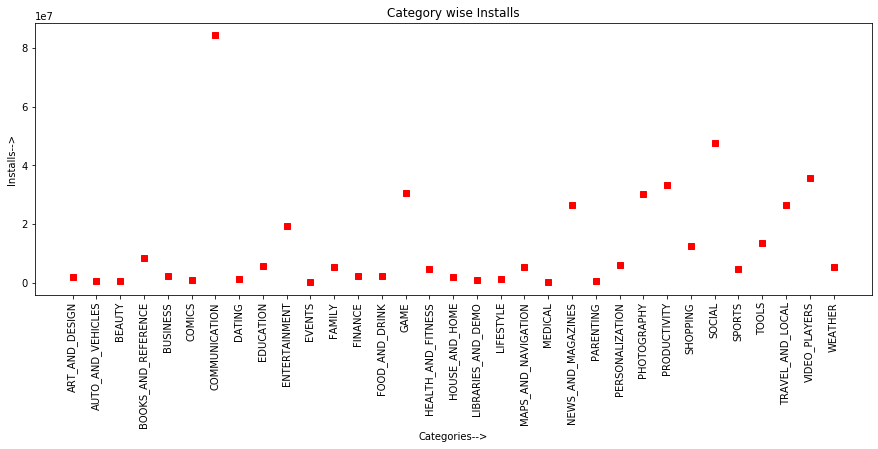

In [38]:
plt.figure(figsize=(15,5))
plt.plot(w, "bs", color="r")
plt.xticks(rotation = 90)
plt.title("Category wise Installs")
plt.ylabel("Installs-->")
plt.xlabel("Categories-->")
plt.show()

### We can see that Communication apps have the most downloads.